In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Набор данных из 150000 записей для обнаружения мошенничества. Цель - EVENT_LABEL 1 = мошенничество 0 = не мошенничество

In [3]:
dataPandasSimple = pd.read_csv('fraud_challenge_150k.csv', delimiter=',')
dataPandasSimple.drop(columns=['EVENT_TIMESTAMP', 'billing_address', 'merchant_id'], inplace=True)
data = dataPandasSimple.to_numpy()
dataPandas = dataPandasSimple.copy()
categoryColumns = dataPandas.select_dtypes(include=['object']).columns.tolist()
numericColumns = dataPandas.select_dtypes(exclude=['object']).columns.tolist()
dataPandas.loc[:, numericColumns] = dataPandas.loc[:, numericColumns].fillna(dataPandas.loc[:, numericColumns].mean())
dataPandas.loc[:, categoryColumns] = dataPandas.loc[:, categoryColumns].fillna(dataPandas[categoryColumns].mode().iloc[0])






In [289]:
# # label encoding y
# from sklearn.preprocessing import LabelEncoder

# # Создание объекта LabelEncoder для целевой переменной
# label_encoder = LabelEncoder()
# dataPandas["EVENT_LABEL"] = label_encoder.fit_transform(dataPandas["EVENT_LABEL"])
# categoryColumns = dataPandas.select_dtypes(include=['object']).columns.tolist()
# numericColumns = dataPandas.select_dtypes(exclude=['object']).columns.tolist()

In [3]:
dataPandas

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,cvv,signature_image,transaction_type,transaction_env,applicant_name,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,D,F,U,X,Linda Wright,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,X,X,H,W,Terri Rivera,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,Q,X,X,Sarah Gray,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,G,G,C,N,Valerie Jenkins,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,X,F,F,G,Amy Coleman,the_NP,K,21.0,1905.0,legit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,3986.0,2890.0,57.0,4544.0,92.98.51.182,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,garza-harper.org,(554)009-9294,West Tara,34817.0,...,W,D,S,W,Heather Burke,yi_US,M,99.0,6681.0,legit
149996,5834.0,1875.0,61.0,4369.0,137.17.200.201,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,henderson-rivas.com,175.477.8512x357,New Sarafurt,35879.0,...,I,X,W,Z,Pamela Hunter,ti_ER,I,85.0,2402.0,legit
149997,4781.0,3371.0,48.0,5135.0,97.11.159.151,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 10_1...,larsen-wright.com,+1-227-374-3408x52516,Priceburgh,84167.0,...,D,H,I,D,Julie Evans,wa_BE,G,22.0,4113.0,legit
149998,6085.0,2306.0,59.0,4846.0,88.43.40.52,Mozilla/5.0 (iPhone; CPU iPhone OS 3_1_3 like ...,hughes-chen.com,+1-119-602-8479x45844,Rogersbury,80391.0,...,X,U,Z,X,Joseph Hunt,kk_KZ,W,70.0,4531.0,legit


<Axes: >

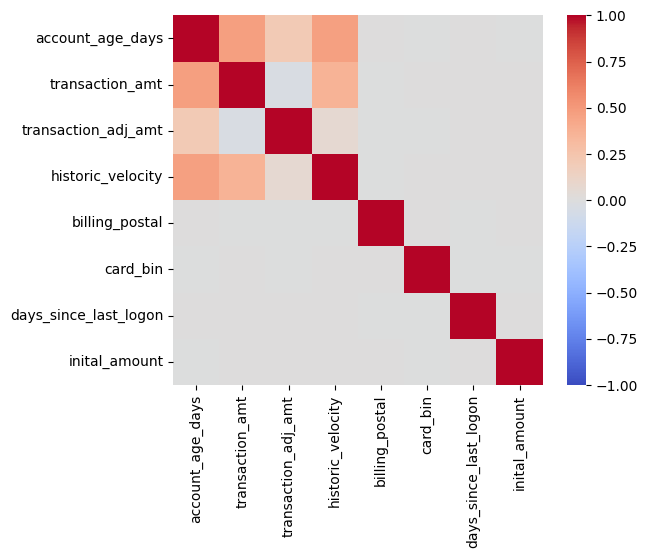

In [4]:

numeric_data = dataPandas.select_dtypes(include=np.number)

correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, square=True, vmin=-1, vmax=1, cmap='coolwarm')


In [4]:
dataPandas.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,4645.751995,2521.458944,54.202434,4702.200033,50190.088160,41837.521512,49.866392,7998.025275
std,1153.400704,604.262142,10.066573,1188.021031,28366.346743,10076.285195,29.191524,4045.344429
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2104.000000,48.000000,3873.000000,25348.000000,35389.000000,25.000000,4491.000000
50%,4666.000000,2543.000000,55.000000,4728.000000,50154.000000,42078.000000,50.000000,7998.025275
75%,5475.000000,2951.000000,61.000000,5548.000000,74318.000000,47373.000000,75.000000,11491.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from category_encoders.binary import BinaryEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
unique_counts = dataPandas.nunique()

print(unique_counts)

categoryColumns = dataPandas.select_dtypes(include=['object']).columns.tolist()
numericColumns = dataPandas.select_dtypes(exclude=['object']).columns.tolist()
print(categoryColumns)
#ohe = BinaryEncoder()
# Преобразование и замена категориальных столбцов на бинарные
#data_encoded = pd.DataFrame(ohe.fit_transform(dataPandas[categoryColumns]))
#dataPandas = pd.concat([dataPandas[numericColumns], data_encoded], axis=1)


ohe = LabelEncoder()

# # data_encoded = pd.DataFrame(ohe.fit_transform(dataPandas[categoryColumns]))
# # dataPandas = pd.concat([dataPandas[numericColumns], data_encoded], axis=1)
data_encoded = pd.DataFrame()
for i in categoryColumns:
    if i != 'EVENT_LABEL':
        data_encoded[i] = pd.DataFrame(ohe.fit_transform(dataPandas[i]))
    else:
        data_encoded[i] = pd.DataFrame(ohe.fit_transform(dataPandas[i]))
dataPandas = pd.concat([dataPandas[numericColumns], data_encoded], axis=1)


account_age_days          6477
transaction_amt           3693
transaction_adj_amt         93
historic_velocity         6759
ip_address               13668
user_agent                8829
email_domain              7143
phone_number             12216
billing_city              9187
billing_postal           11323
billing_state               50
card_bin                  6501
currency                     3
cvv                         26
signature_image             26
transaction_type            26
transaction_env             26
applicant_name           97403
locale                     293
tranaction_initiate         26
days_since_last_logon      102
inital_amount            14002
EVENT_LABEL                  2
dtype: int64
['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'applicant_name', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [39]:
dataPandas.shape

(150000, 23)

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

column_names = dataPandas.columns.tolist()
column_names.remove('EVENT_LABEL')
scaler = MinMaxScaler()
dataPandas[column_names] = scaler.fit_transform(dataPandas[column_names])


<Axes: >

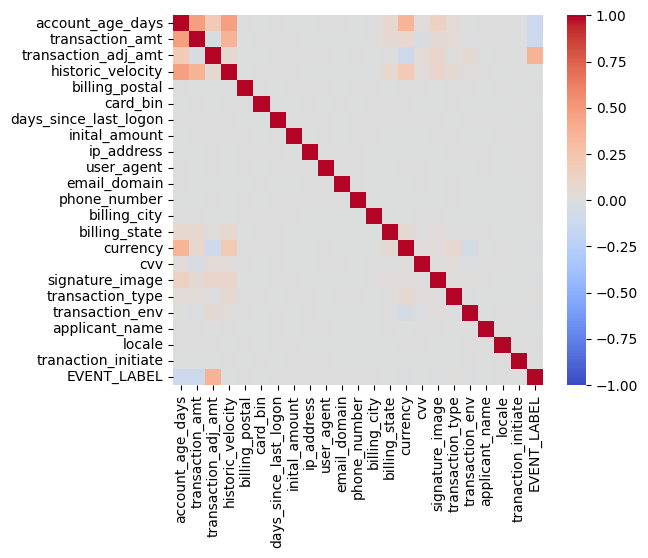

In [7]:
numeric_data = dataPandas.select_dtypes(include=np.number)

correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, square=True, vmin=-1, vmax=1, cmap='coolwarm')

<Axes: >

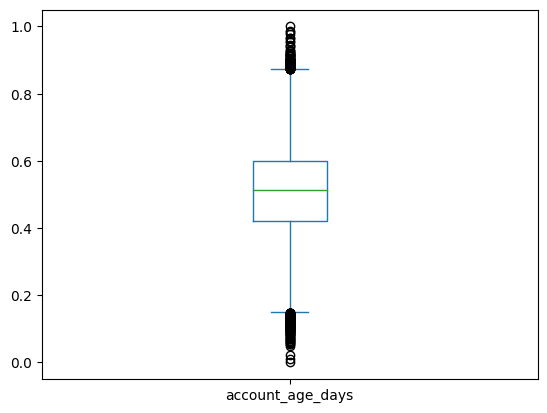

In [30]:
dataPandas['account_age_days'].plot(kind='box')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = dataPandas.drop(columns=['EVENT_LABEL'])
y = dataPandas['EVENT_LABEL'] 

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)



In [9]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy=0.15, random_state=42)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [10]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Получение списка числовых признаков


X_train_resampled[numeric_features] = scaler.fit_transform(X_train_resampled[numeric_features])


X_test[numeric_features] = scaler.transform(X_test[numeric_features])


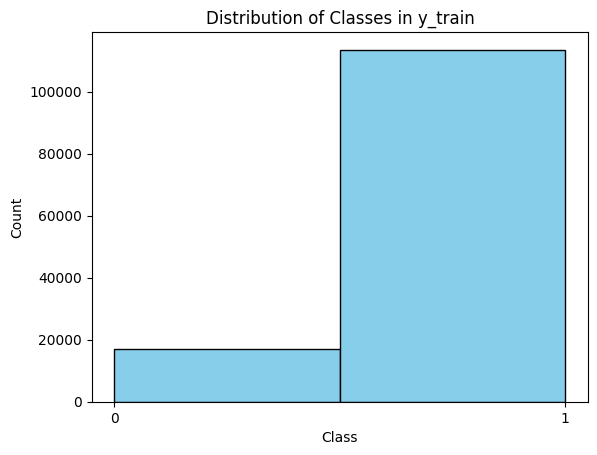

In [11]:
import matplotlib.pyplot as plt

plt.hist(y_train_resampled, bins=2, color='skyblue', edgecolor='black')  # bins=2 для бинарной классификации
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in y_train')
plt.xticks([0, 1])  # Метки для классов (0 и 1)
plt.show()


In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()


param_grid = {'n_neighbors': [1,5,10,15,20,30,40,50,100], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)  # cv - количество фолдов в кросс-валидации

grid_search.fit(X_train_resampled, y_train_resampled)

print("Лучшие параметры:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

accuracy = best_knn.score(X_test, y_test)
print("Accuracy на тестовой выборке:", accuracy)


Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy на тестовой выборке: 0.94465


In [61]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski') #8

best_knn.fit(X_train_resampled, y_train_resampled)



KNeighborsClassifier(n_neighbors=3)

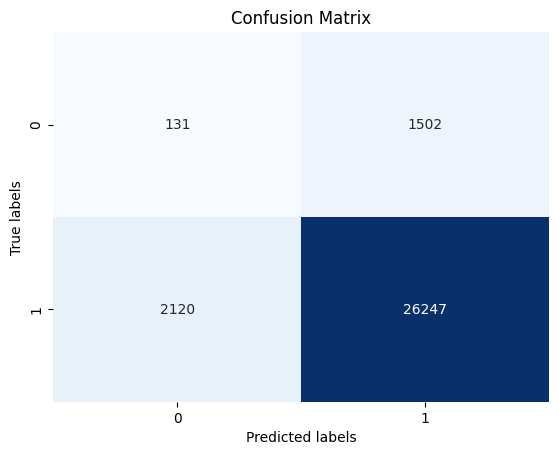

In [62]:
from sklearn.metrics import confusion_matrix

# Получение предсказаний лучшей модели на тестовых данных
y_pred = best_knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar= False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



В связи с тем, что данные сложны для интерпритации с использованием knn из-за большого размера была попытка применения градиентного спуска. 


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7]
# }

param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [7]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

y_pred_best_gb = best_gb_model.predict(X_test)



Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
GradientBoostingClassifier(max_depth=7, random_state=42)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
#grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_classifier1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, max_depth=7, random_state=42)
gb_classifier1.fit(X_train_resampled, y_train_resampled)

y_pred = gb_classifier1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.978


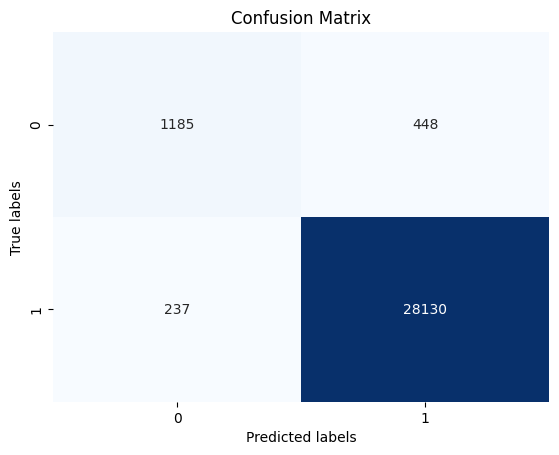

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = gb_classifier1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar= False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [255]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred_best_gb)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_best_gb)
print("Classification Report:")
print(report)


Accuracy: 0.9781333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      3266
           1       0.98      0.99      0.99     56734

    accuracy                           0.98     60000
   macro avg       0.93      0.85      0.88     60000
weighted avg       0.98      0.98      0.98     60000



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=120, random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)
predictions = random_forest.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

       fraud       0.87      0.65      0.74      1633
       legit       0.98      0.99      0.99     28367

    accuracy                           0.98     30000
   macro avg       0.92      0.82      0.86     30000
weighted avg       0.97      0.98      0.97     30000

[[ 1061   572]
 [  165 28202]]



Пробовал разные способы подготовки данных: менял их масштаб, пробовал разные методы кодирования категориальных признаков, и менял соотношение между тестовой и обучающей выборкой. Но ничего из этого не принесло значительных улучшений. В итоге лучшие результаты удалось достичь, используя градиентный бустинг.

Второе дз.

Логистическа регрессия

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(max_iter=1000)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'random_state': [42]  # Пример задания случайного состояния
}


grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Лучшие гиперпараметры:", grid_search.best_params_)


d:\pythonProject\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\pythonProject\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\pythonProject\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\pythonProject\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\pythonProject\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

Лучшие гиперпараметры: {'C': 0.001, 'class_weight': None, 'penalty': 'none', 'random_state': 42, 'solver': 'newton-cg'}


In [19]:

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Точность модели на тестовом наборе данных:", accuracy)

Точность модели на тестовом наборе данных: 0.6128333333333333


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

       fraud       0.08      0.84      0.15      1633
       legit       0.98      0.46      0.62     28367

    accuracy                           0.48     30000
   macro avg       0.53      0.65      0.39     30000
weighted avg       0.93      0.48      0.60     30000

[[ 1367   266]
 [15366 13001]]


In [30]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(max_depth=15,n_jobs=-1)
#y_pred = rf_model.predict(X_test)

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15]
}


grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.predict(X_test)


print("Лучшие гиперпараметры для RandomForest:", grid_search_rf.best_params_)


Лучшие гиперпараметры для RandomForest: {'max_depth': 15, 'n_estimators': 300}


In [36]:
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train, y_train)
y_pred1 = best_model_rf.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

       fraud       0.08      0.84      0.15      1633
       legit       0.98      0.44      0.61     28367

    accuracy                           0.46     30000
   macro avg       0.53      0.64      0.38     30000
weighted avg       0.93      0.46      0.58     30000

[[ 1372   261]
 [15807 12560]]


[1 0]


array([1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # Округляем до ближайшего целого

# Рассчет матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred_classes)

print(cm)

938/938 [==============================] - 1s 555us/step
[[ 1336   297]
 [ 4316 24051]]


In [43]:
print(X_train.shape)
print(y_train.shape)

(120000, 22)
(120000,)


In [12]:
import numpy as np
from itertools import product
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
first_size = np.arange(50, 101, 50)
second_size = np.arange(50, 101, 50)
alpha_values = np.array([0.0001, 0.0005])
hidden_layer_sizes = list(product(first_size, second_size))
params_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'alpha': alpha_values
}
grid = GridSearchCV(MLPClassifier(), params_grid, scoring='f1', return_train_score=False, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_score_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


d:\pythonProject\ML\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(MLPClassifier(alpha=0.0005, hidden_layer_sizes=(50, 50)), 0.9847321678727126)

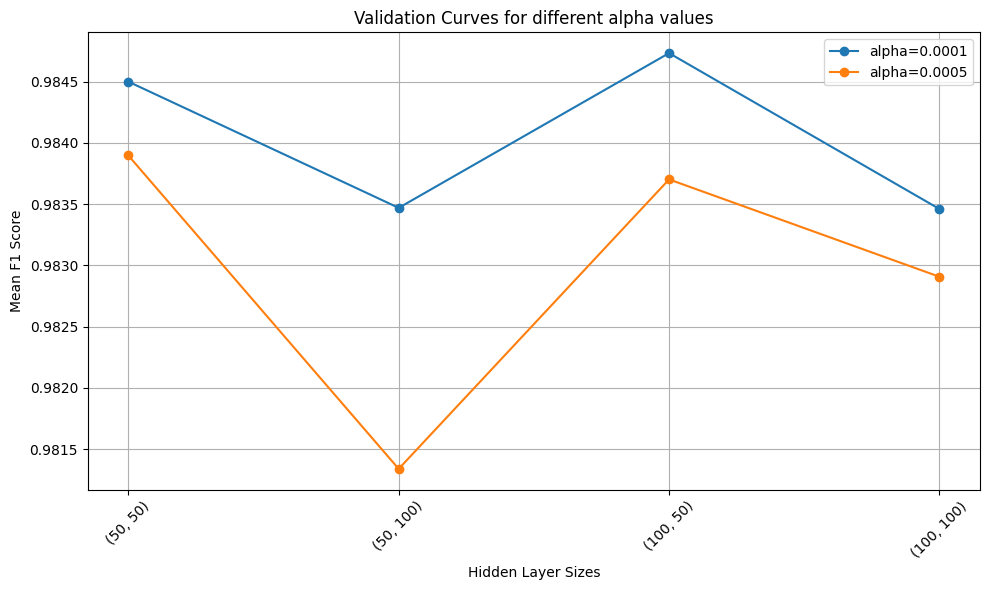

In [17]:
import matplotlib.pyplot as plt


results = grid.cv_results_
alphas = params_grid['alpha']
hidden_sizes = [str(size) for size in params_grid['hidden_layer_sizes']]
scores = results['mean_test_score']


plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.plot(hidden_sizes, scores[i::len(alphas)], marker='o', label=f'alpha={alpha}')

plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean F1 Score')
plt.title('Validation Curves for different alpha values')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = grid.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  


cm = confusion_matrix(y_test, y_pred_classes)

print(cm)

[[ 1431   202]
 [11090 17277]]


In [23]:
print(classification_report(y_test, y_pred_classes))
accuracy = accuracy_score(y_test, y_pred_classes)
print("Точность модели на тестовом наборе данных:", accuracy)

              precision    recall  f1-score   support

           0       0.11      0.88      0.20      1633
           1       0.99      0.61      0.75     28367

    accuracy                           0.62     30000
   macro avg       0.55      0.74      0.48     30000
weighted avg       0.94      0.62      0.72     30000

Точность модели на тестовом наборе данных: 0.6236


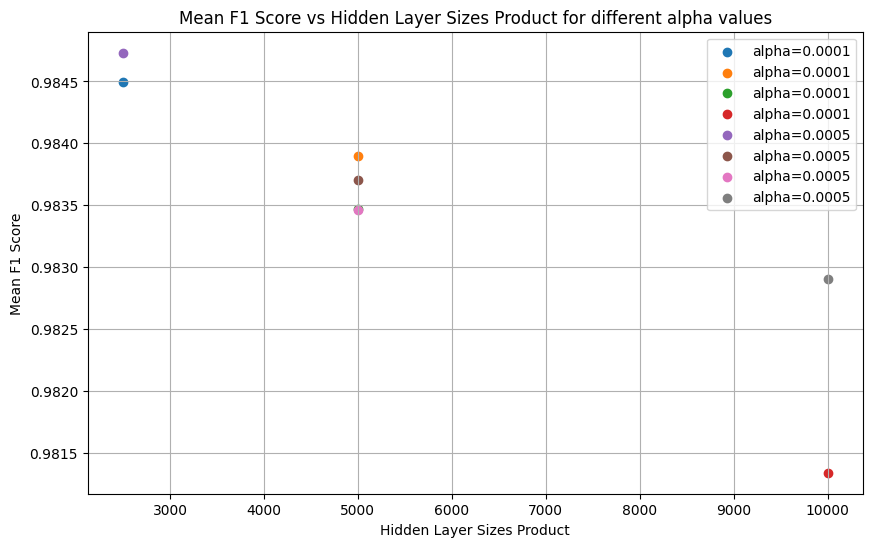

In [14]:
import matplotlib.pyplot as plt


results = grid.cv_results_
hidden_layer_sizes = results['param_hidden_layer_sizes']
alpha_values = results['param_alpha']
scores = results['mean_test_score']


hidden_layer_sizes_numeric = [np.prod(size) for size in hidden_layer_sizes]  
alpha_values_str = [str(val) for val in alpha_values]  


plt.figure(figsize=(10, 6))
for i, val in enumerate(alpha_values_str):
    plt.scatter(hidden_layer_sizes_numeric[i], scores[i], label=f"alpha={val}")

plt.xlabel('Hidden Layer Sizes Product')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score vs Hidden Layer Sizes Product for different alpha values')
plt.legend()
plt.grid(True)
plt.show()


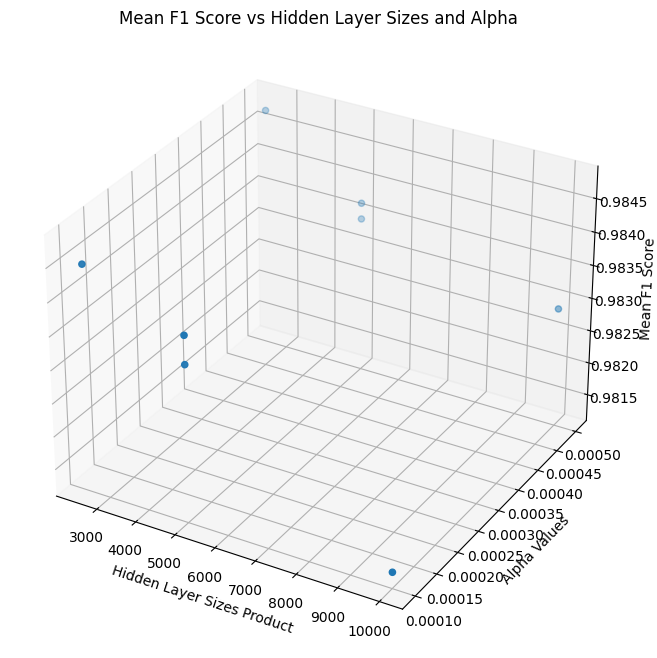

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


results = grid.cv_results_
hidden_layer_sizes = results['param_hidden_layer_sizes']
alpha_values = results['param_alpha']
scores = results['mean_test_score']


hidden_layer_sizes_numeric = [np.prod(size) for size in hidden_layer_sizes]
alpha_values_numeric = [float(val) for val in alpha_values]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(hidden_layer_sizes_numeric, alpha_values_numeric, scores)


ax.set_xlabel('Hidden Layer Sizes Product')
ax.set_ylabel('Alpha Values')
ax.set_zlabel('Mean F1 Score')
ax.set_title('Mean F1 Score vs Hidden Layer Sizes and Alpha')

plt.show()


Во всех трех случаях наблюдается переобучение.

Логистическая регрессия:

Precision для класса "fraud" - 0.08, что означает, что только 8% объектов, отнесенных к классу "fraud", действительно принадлежат этому классу. Recall для этого класса - 0.84, что говорит о том, что модель обнаружила 84% объектов класса "fraud".
Похожие показатели у случайного леса, но немного лучше, чем у логистической регрессии: recall для "fraud" - 0.84, precision - 0.08.
Для класса "legit" у обеих моделей высокая precision (0.98 для логистической регрессии и случайного леса), но низкий recall (0.46 и 0.44 соответственно). Это означает, что модели хорошо идентифицируют объекты класса "legit", но пропускают значительное количество объектов этого класса.

Нейронная сеть:

У нейронной сети более высокие показатели как для класса "fraud", так и для класса "legit". Precision для "fraud" - 0.11, recall - 0.88. Для класса "legit" precision - 0.99, recall - 0.61.
Нейронная сеть имеет более высокий F1-score для обоих классов по сравнению с другими моделями (0.20 для "fraud" и 0.75 для "legit").

Общие выводы:

Нейронная сеть имеет лучшие показатели метрик precision, recall и F1-score для обоих классов по сравнению с логистической регрессией и случайным лесом.
Точность (accuracy) у всех моделей невысока (около 0.5-0.6), что свидетельствует о несбалансированности классов в данных.
В целом, нейронная сеть показывает наилучшее качество по метрикам precision, recall и F1-score среди представленных моделей.